In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [2]:
# Initialize the Kaggle API
api = KaggleApi()
api.authenticate()

In [3]:
# Download the dataset using the correct method and API object
api.dataset_download_files("bushraqurban/world-health-indicators-dataset", path='data/', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/bushraqurban/world-health-indicators-dataset


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('data/world_health_data.csv')

In [12]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [15]:
# Use the correct Seaborn style name
plt.style.use('seaborn-v0_8-darkgrid')

In [16]:
print(df.sample(10))

                 country country_code  year  health_exp  life_expect  \
5637             Curacao          CUW  2020         NaN          NaN   
2926               Aruba          ABW  2010         NaN    75.404000   
577             Colombia          COL  2001    5.942383    71.502000   
5246         Puerto Rico          PRI  2018         NaN    79.770000   
4414                Mali          MLI  2015    4.111434    58.363000   
5432  Iran, Islamic Rep.          IRN  2019    6.273989    76.103000   
3968             Turkiye          TUR  2013    4.370000    76.297000   
492           Seychelles          SYC  2000    4.610718    72.778049   
4044             Czechia          CZE  2014    7.612489    78.824390   
1141              France          FRA  2003   10.082834    79.114634   

      maternal_mortality  infant_mortality  neonatal_mortality  \
5637                 NaN               NaN                 NaN   
2926                 NaN               NaN                 NaN   
577      

In [17]:
print(df.isnull().sum())

country                     0
country_code                0
year                        0
health_exp               1483
life_expect               460
maternal_mortality       1757
infant_mortality          794
neonatal_mortality        794
under_5_mortality         794
prev_hiv                 2380
inci_tuberc              1221
prev_undernourishment    1845
dtype: int64


In [18]:
df = df.dropna()

In [19]:
print(df.duplicated().sum()) 

0


In [20]:
df = df.drop_duplicates()  

In [21]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 2908 entries, 536 to 5851
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                2908 non-null   object 
 1   country_code           2908 non-null   object 
 2   year                   2908 non-null   int64  
 3   health_exp             2908 non-null   float64
 4   life_expect            2908 non-null   float64
 5   maternal_mortality     2908 non-null   float64
 6   infant_mortality       2908 non-null   float64
 7   neonatal_mortality     2908 non-null   float64
 8   under_5_mortality      2908 non-null   float64
 9   prev_hiv               2908 non-null   float64
 10  inci_tuberc            2908 non-null   float64
 11  prev_undernourishment  2908 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 295.3+ KB
None


In [22]:
print(df.describe())

              year   health_exp  life_expect  maternal_mortality  \
count  2908.000000  2908.000000  2908.000000         2908.000000   
mean   2010.609697     6.054213    69.224538          203.850069   
std       5.748843     2.515497     8.651202          254.988513   
min    2001.000000     1.701678    42.125000            1.000000   
25%    2006.000000     4.168398    62.963972           20.000000   
50%    2011.000000     5.576760    71.018756           78.000000   
75%    2016.000000     7.679443    75.758902          320.250000   
max    2020.000000    19.690046    83.904878         1610.000000   

       infant_mortality  neonatal_mortality  under_5_mortality     prev_hiv  \
count       2908.000000         2908.000000        2908.000000  2908.000000   
mean          30.252952           17.111575          42.504041     1.678195   
std           25.396691           12.547540          40.878553     3.901545   
min            1.700000            0.900000           2.100000     0.10

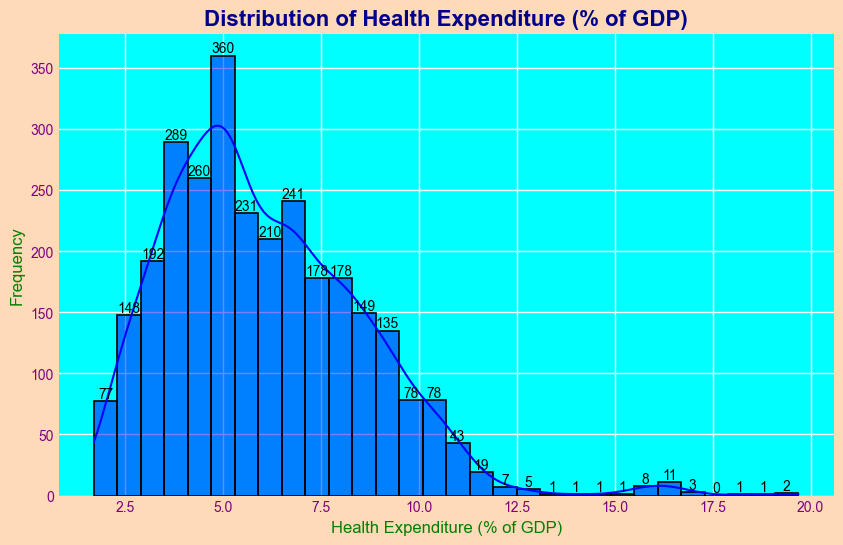

In [32]:
# Create the figure and axes
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('#FFDAB9')  

ax = plt.gca()  
ax.set_facecolor('#00FFFF')

# Define a color palette for bars
bar_colors = sns.color_palette("coolwarm", n_colors=30)

# Plot the histogram with KDE
hist_plot = sns.histplot(df['health_exp'], kde=True, bins=30, color='blue', ax=ax, edgecolor="black", linewidth=1.2)

# Add data labels on the bars
for p in hist_plot.patches:
    height = p.get_height()  # Get the height of each bar
    x = p.get_x() + p.get_width() / 2  # Get the x position (center of the bar)
    ax.text(x, height, f'{height:.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Customize title and labels
plt.title('Distribution of Health Expenditure (% of GDP)', fontsize=16, color='darkblue', weight='bold')
plt.xlabel('Health Expenditure (% of GDP)', fontsize=12, color='green')
plt.ylabel('Frequency', fontsize=12, color='green')

# Customize axis tick labels
plt.xticks(color='purple', fontsize=10)
plt.yticks(color='purple', fontsize=10)

# Save the customized figure
plt.savefig('customized_health_expenditure_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

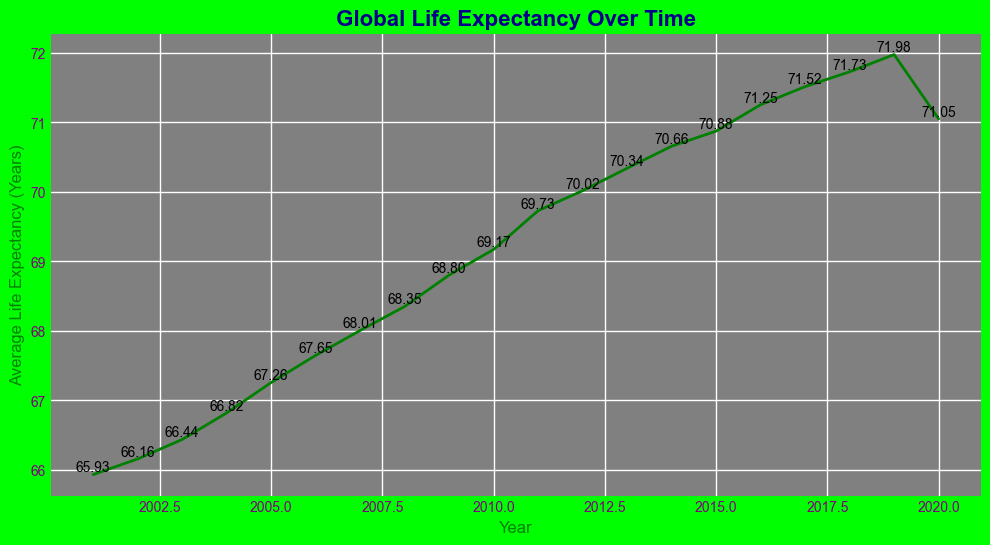

In [40]:
# Create a figure with custom background color
fig = plt.figure(figsize=(12, 6))
fig.patch.set_facecolor('#00FF00')  # Set figure background color (Green)

# Create axis object
ax = fig.add_subplot(111)
ax.set_facecolor('#808080')  # Set axes background color (Gray)

# Group the data by 'year' and calculate the mean 'life_expect'
global_life_expectancy = df.groupby('year')['life_expect'].mean()

# Plot the line with green color
ax.plot(global_life_expectancy.index, global_life_expectancy.values, color='green', linewidth=2)

# Customize the plot with title and labels
plt.title('Global Life Expectancy Over Time', fontsize=16, color='darkblue', weight='bold')
plt.xlabel('Year', fontsize=12, color='green')
plt.ylabel('Average Life Expectancy (Years)', fontsize=12, color='green')

# Customize grid and ticks
plt.grid(True)
plt.xticks(color='purple', fontsize=10)
plt.yticks(color='purple', fontsize=10)

# Add data labels at each point on the line
for i in range(len(global_life_expectancy)):
    ax.text(global_life_expectancy.index[i], global_life_expectancy.iloc[i], 
            f'{global_life_expectancy.iloc[i]:.2f}', ha='center', va='bottom', fontsize=10, color='black')


plt.savefig('Life_expectancy_over_time_with_background_colors.png', dpi=300)
plt.show()


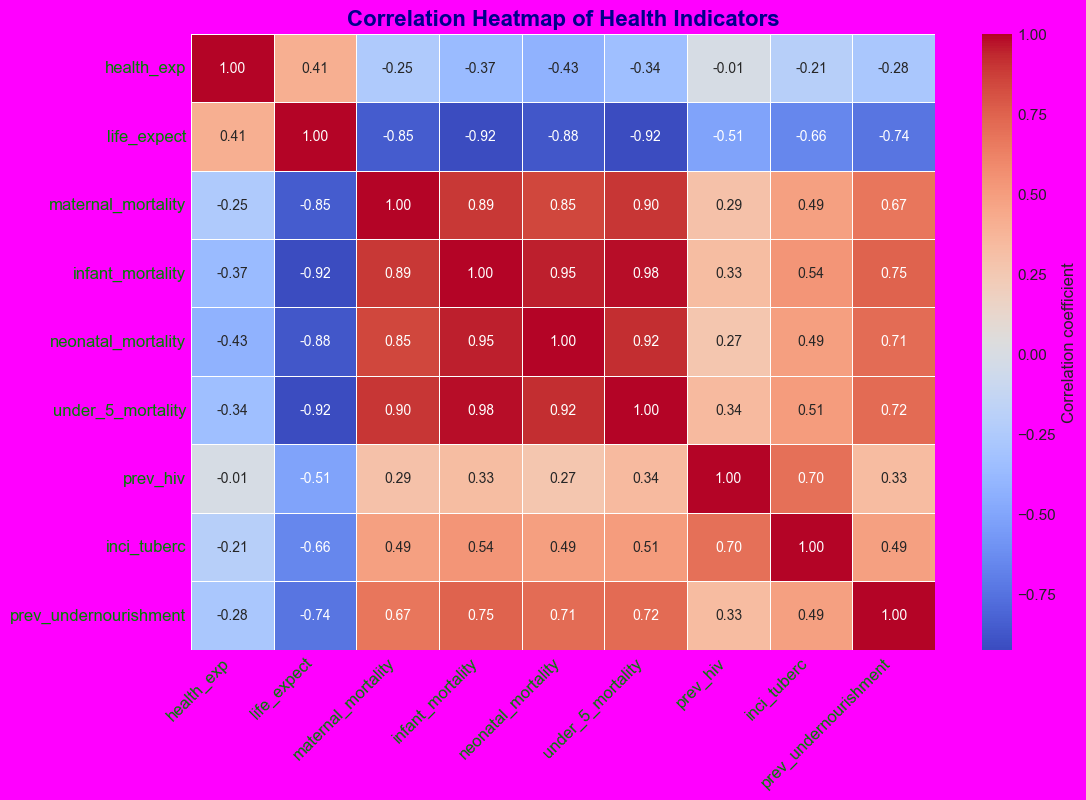

In [43]:
# Correlation matrix of selected health indicators
correlation_matrix = df[['health_exp', 'life_expect', 'maternal_mortality', 'infant_mortality', 
                         'neonatal_mortality', 'under_5_mortality', 'prev_hiv', 'inci_tuberc', 
                         'prev_undernourishment']].corr()

# Create a figure and axes with custom background colors
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('#FF00FF')  

ax = fig.add_subplot(111)
ax.set_facecolor('#4B0082')  

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
            cbar_kws={'label': 'Correlation coefficient'}, annot_kws={'size': 10}, ax=ax)

# Set the title and axis labels with custom styles
plt.title('Correlation Heatmap of Health Indicators', fontsize=16, color='darkblue', weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12, color='green')
plt.yticks(rotation=0, fontsize=12, color='green')

plt.savefig('Correlation_of_selected_health_indicators.png', dpi=300, bbox_inches='tight')
plt.show()


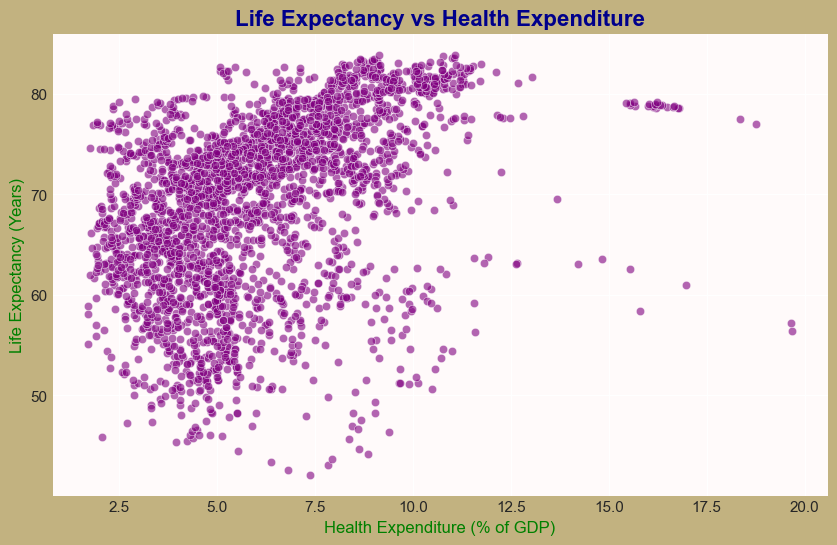

In [44]:
# Create a figure with custom background color
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('#C2B280') 

# Create axis object with custom background color
ax = fig.add_subplot(111)
ax.set_facecolor('#FFFAFA') 

# Scatter plot of Life Expectancy vs Health Expenditure
sns.scatterplot(x='health_exp', y='life_expect', data=df, color='purple', alpha=0.6, ax=ax)

# Customize the plot with title and labels
plt.title('Life Expectancy vs Health Expenditure', fontsize=16, color='darkblue', weight='bold')
plt.xlabel('Health Expenditure (% of GDP)', fontsize=12, color='green')
plt.ylabel('Life Expectancy (Years)', fontsize=12, color='green')

plt.savefig('Life_Expectancy_vs_Health_Expenditure.png', dpi=300, bbox_inches='tight')
plt.show()


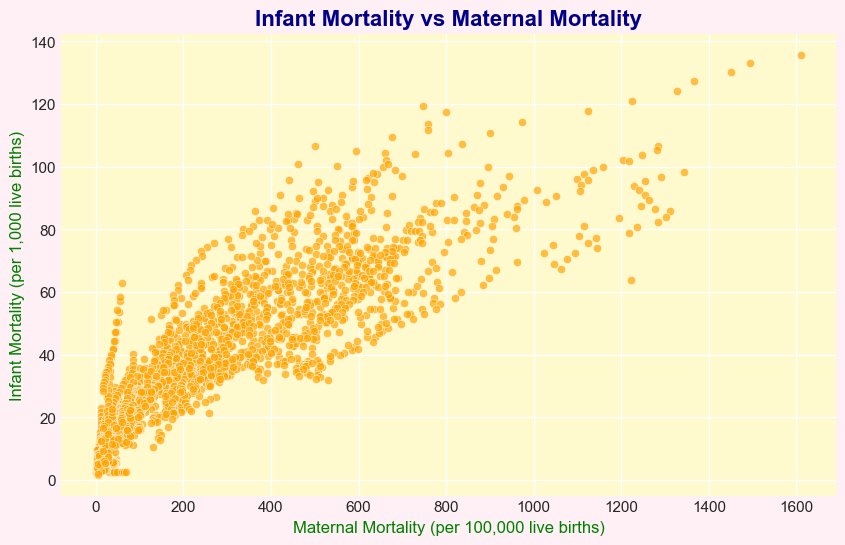

In [46]:
# Create a figure with custom background color
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('#FFF0F5')  

ax = fig.add_subplot(111)
ax.set_facecolor('#FFFACD') 

# Scatter plot of Infant Mortality vs Maternal Mortality
sns.scatterplot(x='maternal_mortality', y='infant_mortality', data=df, color='orange', alpha=0.7, ax=ax)

# Customize the plot with title and labels
plt.title('Infant Mortality vs Maternal Mortality', fontsize=16, color='darkblue', weight='bold')
plt.xlabel('Maternal Mortality (per 100,000 live births)', fontsize=12, color='green')
plt.ylabel('Infant Mortality (per 1,000 live births)', fontsize=12, color='green')

plt.savefig('Infant_Mortality_vs_Maternal_Mortality.png', dpi=300, bbox_inches='tight')
plt.show()


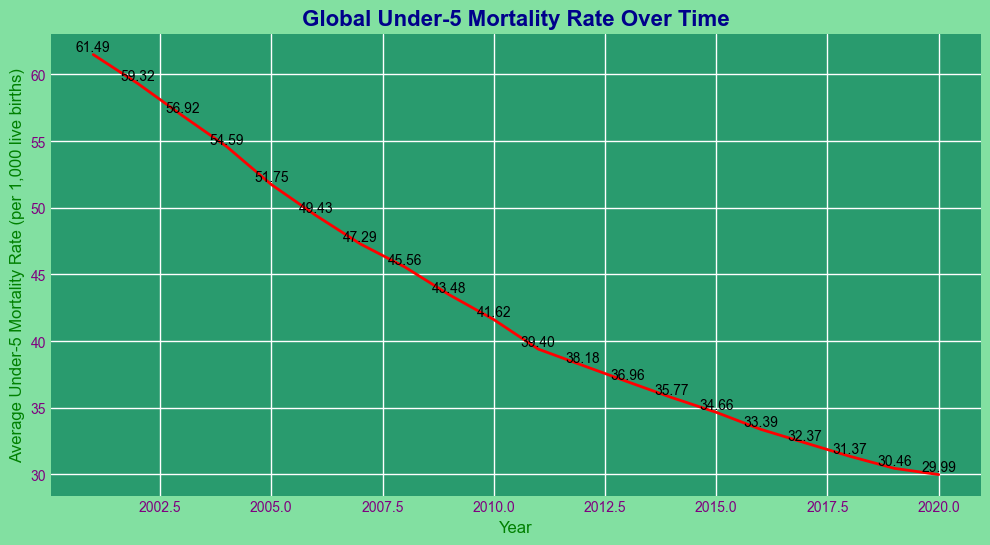

In [50]:
fig = plt.figure(figsize=(12, 6))
fig.patch.set_facecolor('#82E0A1')  

ax = fig.add_subplot(111)
ax.set_facecolor('#299B6E') 

# Line plot of Global Under-5 Mortality Rate Over Time
global_under_5_mortality = df.groupby('year')['under_5_mortality'].mean()
global_under_5_mortality.plot(kind='line', color='red', linewidth=2, ax=ax)

# Customize the plot with title and labels
plt.title('Global Under-5 Mortality Rate Over Time', fontsize=16, color='darkblue', weight='bold')
plt.xlabel('Year', fontsize=12, color='green')
plt.ylabel('Average Under-5 Mortality Rate (per 1,000 live births)', fontsize=12, color='green')

# Customize grid and ticks
plt.grid(True)
plt.xticks(color='purple', fontsize=10)
plt.yticks(color='purple', fontsize=10)

# Adding data labels to each point on the line
for year, value in global_under_5_mortality.items():
    ax.text(year, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.savefig('Under-5_mortality_rate_over_time_with_background_colors.png', dpi=300, bbox_inches='tight')
plt.show()


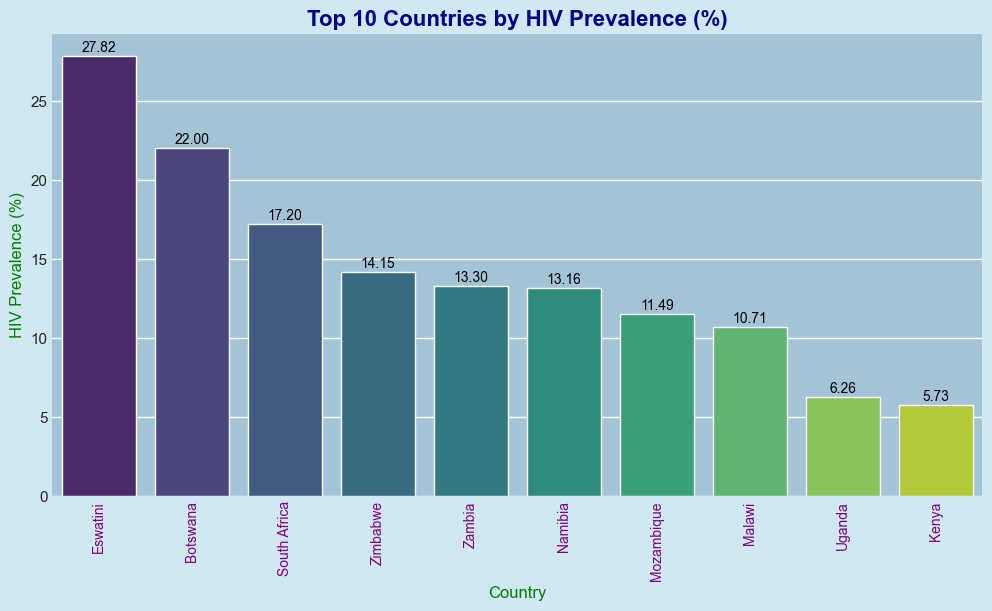

In [54]:
# Bar plot for Prevalence of HIV by Country (Top 10)

top_hiv_countries = df.groupby('country')['prev_hiv'].mean().sort_values(ascending=False).head(10)

# Create figure with custom background color
fig = plt.figure(figsize=(12, 6))
fig.patch.set_facecolor('#D0E8F2') 

# Create axis object with custom background color
ax = fig.add_subplot(111)
ax.set_facecolor('#A3C4D7') 

# Plot the bar plot with Seaborn, using 'hue' parameter
sns.barplot(x=top_hiv_countries.index, y=top_hiv_countries.values, hue=top_hiv_countries.index, ax=ax, palette='viridis', legend=False)

# Customize the plot with title and labels
plt.title('Top 10 Countries by HIV Prevalence (%)', fontsize=16, color='darkblue', weight='bold')
plt.xlabel('Country', fontsize=12, color='green')
plt.ylabel('HIV Prevalence (%)', fontsize=12, color='green')

# Customize x-tick labels
plt.xticks(rotation=90, color='purple', fontsize=10)

# Adding data labels on top of each bar
for i in range(len(top_hiv_countries)):
    ax.text(i, top_hiv_countries.values[i] + 0.1,  # Position the text above each bar
            f'{top_hiv_countries.values[i]:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Save and display the plot
plt.savefig('Prevalence_of_HIV_by_Country_with_custom_colors_and_labels.png', dpi=300, bbox_inches='tight')
plt.show()
